## DSBD Project 2: Machine Learning Exploration 

#### The button below toggles between two modes to show the notebook:
1. With code and output (Raw Mode)
2. Without code, only output (Presentation Mode)

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle between Raw and 
Presentation Mode."></form>''')



In [16]:
%%HTML
<h3>Cross Positional Player Identification: NCAA Basketball</h3>
<br>

<p>
    Decision making in the sports domain has traditionally relied upon “gut” feeling or adherence to past traditions. 
    But in 2003, the story of Oakland A’s use of sabermetrics to achieve incredible success in Major League Baseball 
    exploded, ushering in a new age of analytics-driven sports. One of the most prominent sports organizations to adopt 
    analytics is the National Basketball Associations.
</p>

<br>

<figure>
    <img src="1.JPG" alt="1" align = 'center'/>
    <figcaption><p style="text-align:center; font-style: italic; font-size: 11px">Under his leadership, the Houston Rockets 
    have risen from a mediocre team to championship contenders.</p>. 
    </figcaption>
</figure>

<p>                    
    Statistics on players and teams have been generated and stored since the early days of the NBA, serving as reference 
    points to scouts but only recently has their insight generating capabilities been realized. Leading the charge is 
    Daryl Morey, General Manager of the Houston Rockets, a former consultant and MIT Sloan Graduate who has not played 
    professional or college basketball.
</p>

<p>
    However, his prior work as a statistical consultant drove him to gain a deeper understanding of basketball and how 
    teams operate inefficiently, costing them wins. Under his leadership, the Houston Rockets have risen from a mediocre 
    team to championship contenders. 
</p>

<br>

<figure>
    <img src="third.JPG" alt="2" align = 'center'/>
    <figcaption><p style="text-align:center; font-style: italic; font-size: 11px">Rajiv Maheswaran at TED2015, March 2015
    </p>. 
    </figcaption>
</figure>
      
<p>
    We were also inspired by Rajiv Maheswaran and the work done by his company, Second Spectrum, which is at the bleeding 
    edge of sports analytics technology. His TED Talk on his company's use of basketball spatiotemporal data to predict 
    shot probabilities in real time validated the potential of machine learning in the field of sports.
</p>

<h3>PROBLEM STATEMENT</h3>
There are two types of scouts that NBA teams deploy:
    <ol>
        <li><b>Personnel Scouts</b>: These are scouts who look at players and decide if they can play, fit their system and 
            are the type of player that will be successful with the salary fitting.
        <li><b>Advanced Scouts</b>: The advance scout is responsible for watching the opponent, diagramming all their plays,
            knowing their calls, knowing their side out of bounds plays and end of game plays.
    </ol>
<p>
    Both these scouting positions have one thing in common: a marathon of traveling and watching games and writing reports. 
    This can make the job very tedious and burn out even the most experienced of professionals. Considering the plethora of 
    talent that is  on display during the NCAA Basketball tournament, it is a hard task to assess and analyze thousands of 
    players participating. Given that out of these players less than 1% get drafted, filtering of these talents is the 
    heart of the problem.
</p>

<p>
    <b> We specifically wish to address the problem faced by Personnel Scouts. A typical strategy of a Personnel Scout 
    involves finding players that best fit their team's current requirement. They maybe looking for Point Guards or 
    Centers, but the tougher task is when they are looking for players that contribute to more than 1 position. Players 
    that can fill in gaps at more than one front. For example, scouts maybe looking for a play maker, a Floor General 
    who can guide his team on the court but at the same time also exhibits great defensive capabilities. Finding these 
    players can be tough. This is the key problem that we address.</b>
</p>


<h3>OBJECTIVE / APPROACH</h3>
<p>
    Player statistics are key indicators of their play style. We use the box score statistics of players in the NCAA to as 
    features to perform unsupervised learning. The number of clusters is based upon the current number of positions in 
    the NBA:
</p>
<figure>
    <img src="position.PNG" alt="3" align = 'center'/>
    <figcaption><p style="text-align:center; font-style: italic; font-size: 11px">Basketball Positions</p> 
    </figcaption>
</figure>

<p>
    Once they are clustered on the basis of these 5 traditional positions, we can identify players that meet the more
    traditional positions in the NBA and more importantly players that do not fall into these traditional positions. These
    border line players, based on their box scores, can possible contribute to more than just one position. Scouts can use
    this information to then profile and filter players based on their requirements saving them great deal of time 
    and effort.
</p>

In [7]:
%%HTML 

<h3>Phase 1: Exploratory Data Analysis</h3>
    
<p>
    The data utilized for this project has been obtained from <a href = 'https://www.kaggle.com/ncaa/ncaa-basketball'>Kaggle's 
    NCAA Basketball dataset </a>. This dataset contains data about NCAA Basketball games, teams, and players. Game data covers 
    play-by-play and box scores back to 2009, as well as final scores back to 1996. Additional data about wins and losses goes 
    back to the 1894-5 season in some teams' cases.
</p>

In [33]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.cluster import MeanShift,AgglomerativeClustering,KMeans,SpectralClustering
from sklearn.metrics import silhouette_score

In [9]:
%%HTML

<h3>Dataset Descriptive Statistics</h3>

<p>
    To get a better understanding of the dataset we saw the statistics. Aditionally we also recorded how many missing values
    did the dataset as the last column. The importance of doing this was to determine:
        <ol>
            <li>Understand the distribution of the data
            <li>Eliminate missing values that may hinder our prediction capabilites moving forward
        </ol>
</p>

In [10]:

# ncaa_df contains layer-level box scores from every men's basketball game from 
# the 2013-14 season to the 2017-18 season. Each row shows a single player's stats in one game.

ncaa_df = pd.read_csv('bq-results-20190418-173125-gs13sh8eyunf.csv')
# Basic Information about the dataframe
info = pd.DataFrame(ncaa_df.describe().T)
info['% missing values'] = ncaa_df.isnull().sum()/len(ncaa_df)*100
print ('DataFrame description and % of missing values')
display(HTML(info.to_html()))

DataFrame description and % of missing values


,count,mean,std,min,25%,50%,75%,max,% missing values
season,888844.0,2015.035653,1.415409,2013.0,2014.0,2015.000,2016.00,2017.0,0.000000
jersey_number,884011.0,16.695575,13.280297,0.0,4.0,14.000,24.00,99.0,0.543740
height,885657.0,76.440322,7.574238,0.0,74.0,77.000,80.00,511.0,0.358556
weight,885657.0,201.224332,34.917996,0.0,185.0,200.000,220.00,2011.0,0.358556
minutes_int64,584696.0,17.519836,12.365439,0.0,6.0,18.000,28.00,58.0,34.218378
field_goals_made,631775.0,2.017511,2.395805,0.0,0.0,1.000,3.00,20.0,28.921723
field_goals_att,631862.0,4.588706,4.697860,0.0,0.0,3.000,8.00,40.0,28.911935
field_goals_pct,636209.0,30.093114,30.021531,0.0,0.0,28.600,50.00,300.0,28.422873
three_points_made,631850.0,0.569722,1.095988,0.0,0.0,0.000,1.00,13.0,28.913285
three_points_att,631860.0,1.639341,2.381797,0.0,0.0,0.000,3.00,23.0,28.912160


In [11]:
%%HTML
<h3>Data Cleaning & Filtering</h3>
<p>
    We proceed with <b>filling in the missing values with 0</b>. We are <b>assuming</b> that if the statistics data is missing 
    it is equivalent to being 0.
</p>

<p>
    As we proceeded with the cleaned dataset we realized that while performing clustering we have too many data points to make
    any sense out of the cluster representations in 2D space. Thus we made he decision of filtering out our data. It was also
    important to perform this filtering to remove players that had <b>zero minutes played</b>. These players would contribute
    no meaningful results to our analysis.
    Moving forward with the same notion of size-able player contribution we further filtered our players. Thus our total list 
    of filters are:
        <ol>
            <li>Players with <b>non-zero</b> playtime
            <li>Players who have played <b>at least 60 games</b> 
            <li>Players who played in two seasons: <b>2016 and 2017</b>
        </ol>
</p>

In [12]:
def data_clean_and_filter(df, columns):
    '''
    Filling in missing values. Since all the values are numerical 
    missing values are imputed with the constant value of 0.
    '''
    
    # Filling in missing values
    df = df.fillna(0)
    
    # Dropping players with 0 minutes of experience
    df = df[df['minutes_int64'] != 0]
    
    # Considering only players in 2016 and 2017 season
    df = df[df['season'].isin([2016, 2017])]
    
    return df
    

cleaned_ncaa_df = data_clean_and_filter(ncaa_df, columns = ['game_id', 'player_id', 'height', 'weight',
                       'minutes_int64', 'field_goals_made', 'field_goals_att','three_points_made', 
                       'three_points_att','two_points_made', 'two_points_att', 'blocked_att', 
                       'free_throws_made', 'free_throws_att', 'offensive_rebounds',
                       'defensive_rebounds', 'rebounds', 'assists', 'turnovers', 'steals', 'blocks',
                       'assists_turnover_ratio', 'personal_fouls', 'tech_fouls', 
                       'flagrant_fouls' ,'points', 'team_name', 'position'])


info = pd.DataFrame(cleaned_ncaa_df.describe().T)
info['% missing values'] = cleaned_ncaa_df.isnull().sum()/len(cleaned_ncaa_df)*100
print ('DataFrame description and % of missing values')
display(HTML(info.to_html()))

DataFrame description and % of missing values


,count,mean,std,min,25%,50%,75%,max,% missing values
season,240795.0,2016.497872,0.499997,2016.0,2016.0,2016.0,2017.000,2017.0,0.0
jersey_number,240795.0,15.058128,12.732783,0.0,3.0,12.0,23.000,76.0,0.0
height,240795.0,75.357462,11.744273,0.0,74.0,77.0,80.000,511.0,0.0
weight,240795.0,197.134322,43.548976,0.0,185.0,200.0,220.000,2011.0,0.0
minutes_int64,240795.0,20.041608,11.154828,1.0,11.0,20.0,29.000,58.0,0.0
field_goals_made,240795.0,2.557669,2.483668,0.0,0.0,2.0,4.000,18.0,0.0
field_goals_att,240795.0,5.780569,4.685464,0.0,2.0,5.0,9.000,40.0,0.0
field_goals_pct,240795.0,37.844988,29.063847,0.0,0.0,40.0,55.600,300.0,0.0
three_points_made,240795.0,0.749571,1.216415,0.0,0.0,0.0,1.000,13.0,0.0
three_points_att,240795.0,2.142511,2.558338,0.0,0.0,1.0,3.000,22.0,0.0


In [13]:
%%HTML

<h3>Data Aggregation</h3>

<p>
    Each row in the ncaa_df contains <b>player-level box scores</b> from every NCAA men's basketball game from the <b>2016</b> 
    and <b>2017</b> season. Each row shows a single player's stats in one game. The data NCAA provides is very <b>granular
    </b>. 
    The following code <b>aggregates the box score statistics<b> of players.
</p>

In [14]:
player_data2 = pd.DataFrame(cleaned_ncaa_df.groupby(['player_id', 'full_name', 'team_name', 'position'])
                                                    [['points', 'field_goals_made', 
                                                     'field_goals_att', 'three_points_made', 
                                                     'three_points_att', 'two_points_made', 
                                                     'two_points_att', 'blocked_att', 'free_throws_made',
                                                    'free_throws_att', 'offensive_rebounds',
                                                    'defensive_rebounds', 'rebounds', 'assists', 
                                                     'turnovers', 'steals', 'blocks', 
                                                     'assists_turnover_ratio', 'personal_fouls', 
                                                     'tech_fouls','flagrant_fouls', 'height', 'weight']].mean())

sizes = list(cleaned_ncaa_df.groupby(['player_id', 'full_name', 'team_name', 'position']).size())

player_data2['games_played'] = sizes

player_data2['field_goal_perc'] = ((player_data2['field_goals_made'] / 
                                   player_data2['field_goals_att']) * 100) \
                                    .apply(lambda x: round(x,1)).fillna(0)

player_data2['three_points_perc'] = ((player_data2['three_points_made'] / 
                                   player_data2['three_points_att']) * 100) \
                                    .apply(lambda x: round(x,1)).fillna(0)

player_data2['free_throws_perc'] = ((player_data2['free_throws_made'] / 
                                   player_data2['free_throws_att']) * 100) \
                                    .apply(lambda x: round(x,1)).fillna(0)

player_data2['two_points_perc'] = ((player_data2['two_points_made'] / 
                                   player_data2['two_points_att']) * 100) \
                                    .apply(lambda x: round(x,1)).fillna(0)

aggregated_player_stats = player_data2[['points', 'field_goals_made', 'field_goals_att', 
                                        'field_goal_perc', 'three_points_made', 'three_points_att', 
                                        'three_points_perc', 'two_points_made', 'two_points_att', 
                                        'two_points_perc', 'blocked_att', 'free_throws_made', 
                                        'free_throws_att', 'free_throws_perc', 'offensive_rebounds',
                                        'defensive_rebounds', 'rebounds', 'assists', 'turnovers', 
                                        'steals', 'blocks', 'assists_turnover_ratio', 'personal_fouls', 
                                        'tech_fouls','flagrant_fouls', 'games_played', 'height', 'weight']]

aggregated_player_stats = aggregated_player_stats[aggregated_player_stats['games_played'] > 60]
print ('Aggregated Player Statistics')
aggregated_player_stats.head(10)

Aggregated Player Statistics


,,,,points,field_goals_made,field_goals_att,field_goal_perc,three_points_made,three_points_att,three_points_perc,two_points_made,two_points_att,two_points_perc,...,turnovers,steals,blocks,assists_turnover_ratio,personal_fouls,tech_fouls,flagrant_fouls,games_played,height,weight
player_id,full_name,team_name,position,,,,,,,,,,,,,,,,,,,,,
00ccee43-07dd-4007-b7f5-871f77243a37,Isaac Haas,Boilermakers,C,13.642857,4.914286,8.157143,60.2,0.000000,0.000000,0.0,4.914286,8.157143,60.2,...,1.942857,0.200000,1.028571,0.317857,2.257143,0.042857,0.0,70,86.0,290.0
0113c9c0-e95d-4477-b5e6-7107f405fcc8,Aundre Jackson,Ramblers,F,12.414286,4.971429,8.014286,62.0,0.485714,1.228571,39.5,4.485714,6.785714,66.1,...,1.614286,0.485714,0.300000,0.465714,2.442857,0.000000,0.0,70,77.0,230.0
0124ee7b-ba02-4ceb-b097-bac5c5e8d6d2,Ky Bowman,Eagles,G,15.970149,5.656716,12.567164,45.0,2.119403,5.343284,39.7,3.537313,7.223881,49.0,...,3.044776,1.313433,0.238806,1.577910,2.507463,0.000000,0.0,67,73.0,188.0
01307891-7b37-4ac0-ab88-fb4f8ddfa444,Ikenna Ndugba,Bulldogs,G,9.825397,3.238095,8.619048,37.6,1.142857,3.682540,31.0,2.095238,4.936508,42.4,...,2.746032,1.571429,0.015873,1.786984,3.015873,0.031746,0.0,63,72.0,190.0
018da264-0c34-46ff-bf93-12f08ba6b9a2,George King,Buffaloes,G,12.000000,4.257576,9.409091,45.2,1.651515,4.272727,38.7,2.606061,5.136364,50.7,...,1.833333,0.500000,0.424242,0.477424,2.272727,0.015152,0.0,66,78.0,225.0
0195b3d3-22a1-40ac-9fda-aba72e172e5e,Lesley Varner Jr.,Vaqueros,F,4.584615,1.507692,4.123077,36.6,0.461538,1.692308,27.3,1.046154,2.430769,43.0,...,0.784615,0.907692,0.230769,0.264154,1.907692,0.000000,0.0,65,79.0,180.0
01b176d3-b2fa-4e96-953a-dd3f7b819316,Devonnte Holland,Highlanders,F,4.158730,1.666667,3.158730,52.8,0.000000,0.015873,0.0,1.666667,3.142857,53.0,...,1.206349,0.174603,0.317460,0.140159,2.015873,0.000000,0.0,63,79.0,240.0
01b35f80-f64c-4e5e-8a8d-e9d7aac6a081,Mathieu Kamba,Bears,G,13.850746,5.044776,9.626866,52.4,0.552239,1.507463,36.6,4.492537,8.119403,55.3,...,2.253731,0.955224,0.761194,1.080448,2.582090,0.000000,0.0,67,77.0,210.0
02712bd5-331a-4fcc-bdcd-154d8afb138f,Devin Peterson,Catamounts,G,8.786885,3.245902,8.786885,36.9,0.508197,1.885246,27.0,2.737705,6.901639,39.7,...,2.131148,0.967213,0.180328,1.791475,2.098361,0.032787,0.0,61,73.0,175.0


In [15]:
%%HTML

<h3>Univariate and Bivariate Analysis</h3>

<p>
    The function accepts two arguments:
    <ol>
        <li> Type of analysis requested 
            <ol>
                <li>Box-plots
                <li>Correlation Matrix
            </ol>
        <li> Dataframe upon which the analysis is to be done 
    </ol>
</p>

In [16]:
def uni_bi_analysis(analysis, df):
    '''
    The function accepts two arguments: 
        1. Type of analysis requested 
            A. Box-plots 
               made using dataframe boxplot function 
               
            B. Correlation Matrix 
               seaborn heatmap
               
        2. Dataframe upon which the analysis is to be done 
    '''
    if analysis == 'boxplot':
        for column1 in df:
            df.boxplot(column=column1)
            plt.show()
    elif analysis == 'correlation':
        corr = df.corr()
        f, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,ax=ax)

In [17]:
%%HTML
<h3>Boxplots</h3>

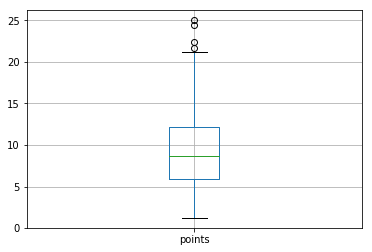

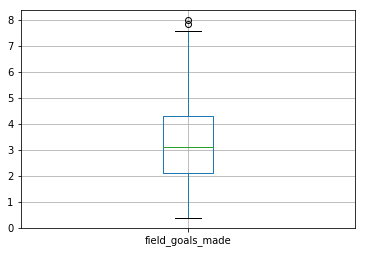

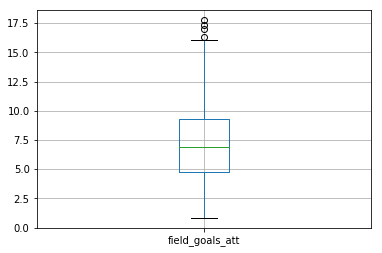

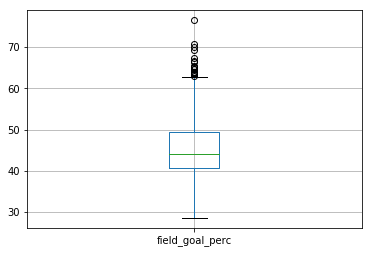

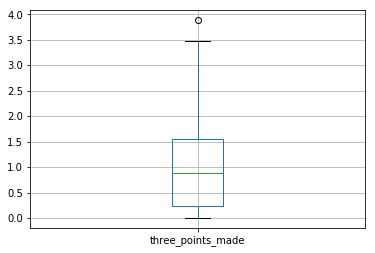

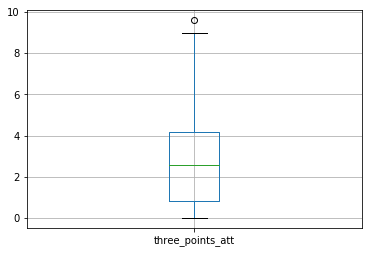

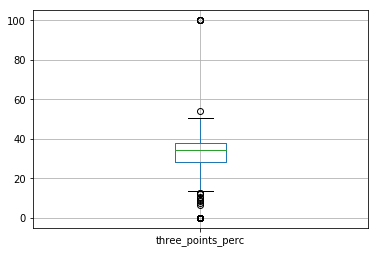

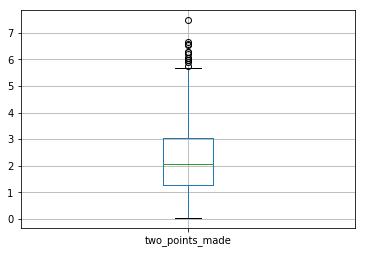

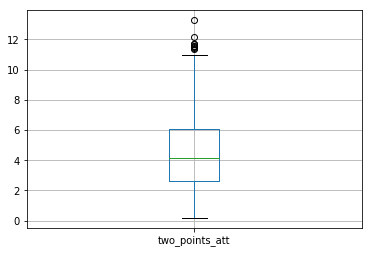

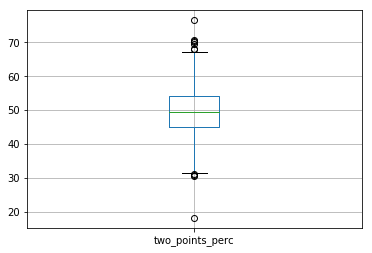

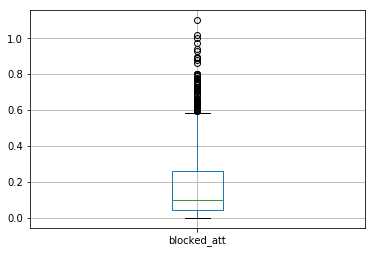

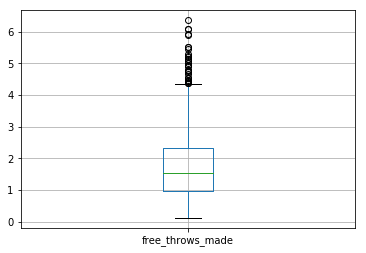

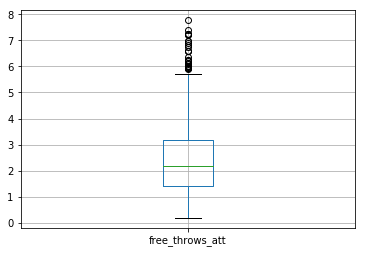

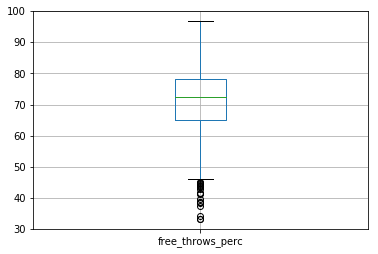

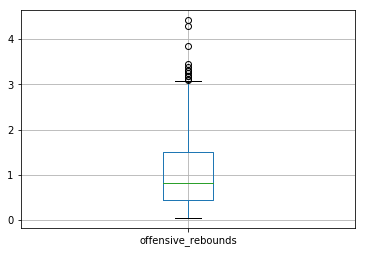

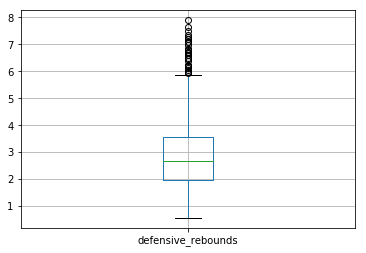

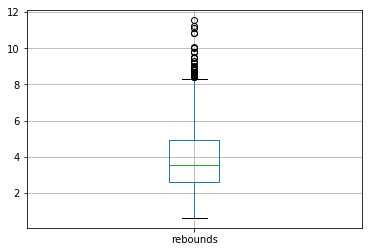

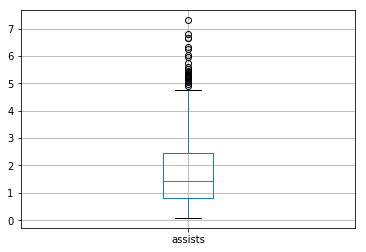

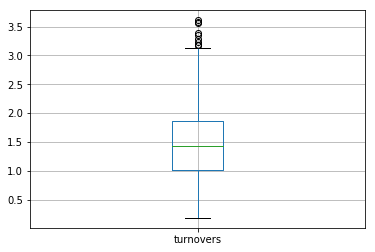

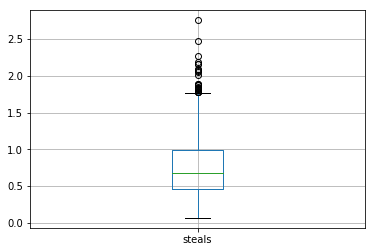

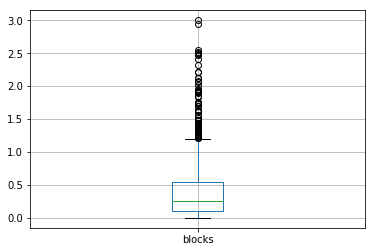

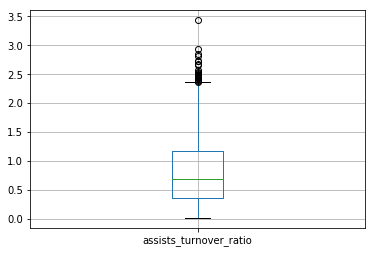

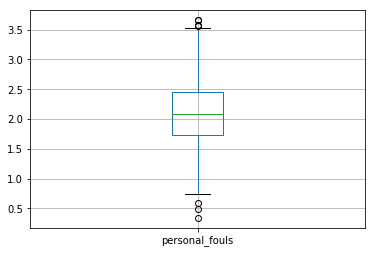

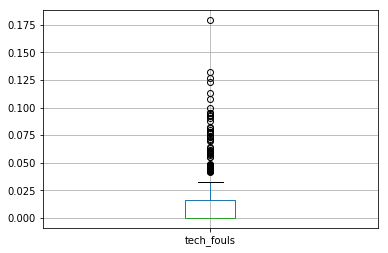

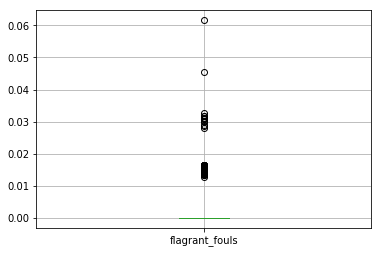

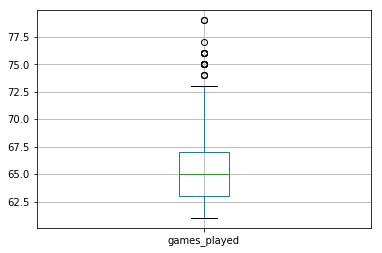

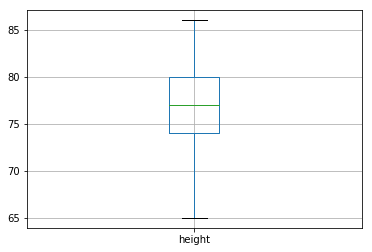

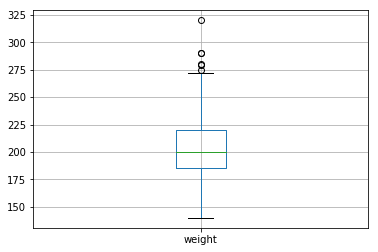

In [18]:
uni_bi_analysis('boxplot',aggregated_player_stats)

In [19]:
%%HTML
<h3>Correlation Matrix</h3>

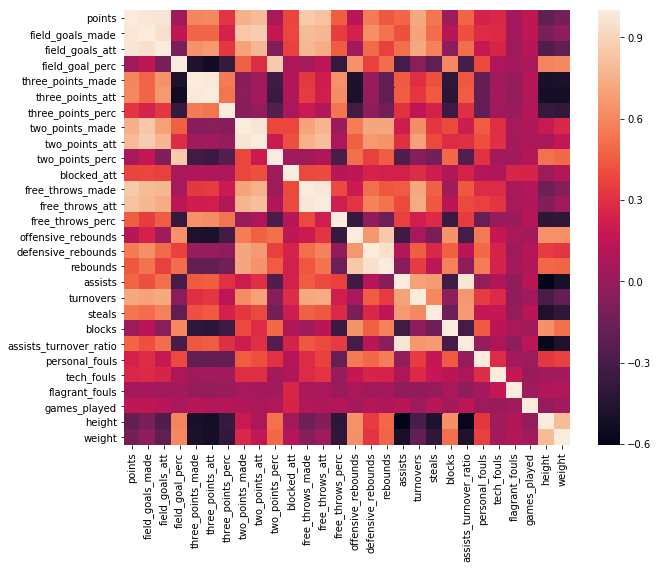

In [20]:
uni_bi_analysis('correlation',aggregated_player_stats)

In [13]:
%%HTML

<h3>Phase 2: Machine Learning</h3>

<p>
    The machine learning approach for this problem is to perform <b>unsupervised learning using player box score 
    statistics</b> over the 2016 and 2017 season. Besides these scores, the data also includes <b>two biometric data 
    fields</b> namely height and weight of the player. This information is vital too as some of the position allocations 
    are dependent on the height of the player, for example the centers are usually the tallest players in the team as they 
    are required for defensive capabilities as well as to collect rebounds.
</p>

<h3>Data Scaling</h3>

<p>
    The data is also scaled before being used for Phase 2 of Machine Learning. Some of the stats can be significantly 
    greater in magnitude. More importantly, unscaled data can be especially <b>problematic for dimensionality reduction</b>.
    When using PCA, if the data is not balanced it will result in most of the variance being explained by just a single 
    Principal Component which will be due to the features will large magnitudes.
</p>

<p>
    For our scaling purposes we use <b>sklearn's preprocessing module's scale</b>. It standardizes a dataset along an axis, 
    centers the mean, and component wise scale to unit variance.
</p>

<h3>Dimensionality Reduction</h3>

<p>
    Our clustering techniques are dealing with 28 features thus, a 28 dimensional space. We need to represent data in a 
    lower dimensional space, primarily to aid visualization of our clusters. Here we employ the use of two popular 
    techniques for dimensionality reduction:
    <ol>
        <li><b>Principal Component Analysis (PCA)</b>: using PCA gives us the capabilities of reducing the dimensionality 
            of the NCAA Basketball dataset that consists of variables that maybe realted to each other whille retaining 
            as much variations as possible. <b>Function PCA1</b> implements PCA using sklearn.
            <br><br>
        <li><b>t-Distributed Stochastic Neighbor Embedding (TSNE)</b>: is a tool to visualize high-dimensional data. It 
            converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler 
            divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
            <b>Function tsne</b> implements TSNE using sklearn.
    </ol>
</p>

<h3>Strategy for Clustering</h3>

<p>
    The strategy that we are following for the corresponding part of the notebook is as follows:
    <ul><b>Step 1</b>: Cluster based players based on box-score statistics. Cluster them into 5 clusters. We want to 
                        cluster them into the traditional 5 positions of basketball. 
    </ul>
    <ul>
        <b>Step 2</b>: Once the clustering is done, use PCA and TSNE to visualize the clusters. The parameters of TSNE i.e. 
                       preplexity and learning rate are constantly adjusted so as to get the best possible representation 
                       of the data. We select the best algorithm based on the visual representation of the clusters 
                       and silhouette score.
    </ul>
    <ul>
        <b>Step 3</b>: Perform EDA analysis on clusters to check if the clusters are indeed clustering players together 
                       who have the same positions. This forms our way of measuring the success of the clustering model. 
                       Each player playing a specific positions does so because of a specific skill set of that player.
                       <br><br>
                       Along with EDA we also use the <b>silhouette score</b> of the clusters formed using different                                  
                       techniques to compare their performances. Silhouette analysis can be used to study the separation                              
                       distance between the resulting clusters. The silhouette plot displays a measure of how close each 
                       point in one cluster is to points in the neighboring clusters and thus provides a way to assess 
                       parameters like number of 
                       clusters visually. This measure has a range of [-1, 1]. Silhouette coefficients (as these values are 
                       referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value 
                       of 0 indicates that the sample is on or very close to the decision boundary between two neighboring 
                       clusters and negative values indicate that those samples might have been assigned to the wrong 
                       cluster.
                <br><br>
                    <b>Classification of the clusters as Point Guards, Centers, Power Forwards, Small Forwards and 
                    Shooting Guards is based strictly upon the following set of assumptions:</b>
                    <ol>
                        <b>Point Guard</b>:
                            <ol>
                                The Point Guard is usually the shortest but the best ball handler on the team. Also known 
                                as the ‘coach on the floor’ or the ‘floor general’, a point guard is responsible for 
                                directing plays.He needs to have good court vision to create open shots for the receivers 
                                as well as drive the ball down the court and initiate offensive plays. <b>Thus we focus on 
                                assists and above average 3-point shooting.</b>
                            </ol>
                    </ol>
                    
                    <ol>
                        <b>Shooting Guard</b>:
                            <ol>
                                 Potentially the shortest player on the team, the Shooting Guard is the team’s best outside 
                                shooter. Besides being able to shoot well, the Shooting Guard needs to be good at dribbling 
                                fast, passing and having court vision by seeing the court. He is also responsible for 
                                driving the ball down the court and setting up offensive plays. A good Shooting Guard will 
                                be a threat to his opponent as he’s able to score from anywhere on the court. <b>Thus we 
                                focus more on points scored and three point percentage.</b>
                            </ol>
                    </ol>
                    
                    
                    <ol>
                        <b>Small Forward</b>:
                            <ol>
                                The Small Forward is usually the shorter of the two forwards on the team but plays the most 
                                versatile role out of the main five positions. He must have enough height and the ability 
                                to play on the inside as well as agility to play on the outside, similar to a shooting 
                                guard. Small Forwards are usually the second or third best shooters on the team and should 
                                be able to do a little bit of everything on the court. <b>We thus looked for players that 
                                had good overall statistics.</b>
                            </ol>
                    </ol>
                    
                    <ol>
                        <b>Power Forward</b>:
                            <ol>
                                Power Forwards are usually the second tallest in the team and are the closest to the center 
                                in terms of physical attributes and playing style but with more speed. They are often the 
                                most versatile player, being able to score in the paint as well as being able to shoot 
                                from midrange. It will be more effective if they are able to land a three-point consistently.
                                Defensively, they are required to have the strength to guard bigger players close to the 
                                basket. <b>Thus we focused on height and two point percentage for mid range capabilities.
                                </b>
                            </ol>
                    </ol>
                    
                    <ol>
                        <b>Center</b>:
                            <ol>
                                 The center is usually the team’s tallest and strongest player and is positioned under the 
                                basket. He is also required to be physically domineering with more physical strength and 
                                athleticism. On the offensive play, most centers do not consistently score midrange or 
                                beyond the arch. Instead, most of their points should be from offensive rebounds and are 
                                also required to block defenders to open other players up for driving to the basket. On 
                                the defence, the center is responsible for keeping the opponent from shooting by blocking 
                                shots and passes in the vital area. They are also expected to fight for rebounds as they are 
                                usually taller physically. <b>Thus we focused on height, rebounds and personal fouls (more
                                likely due to defence attempts)</b>
                            </ol>
                    </ol>
                
    </ul>
    
     <ul><b>Step 4</b>: Once we have obtained clusters that perform well in classifying players we focus on the players
                        that are on the border of these clusters. These players have statistics that show that they are
                        effective contributers to both these positions. <b>This provides us with a two fold advantage.
                        A scout looking for players that conform to more traditional roles can be identified as the ones
                        tighter in the cluster, while the players on the on the border are those can fill in more demanding
                        gaps at different fronts.</b>
    </ul>
    </ol>
</p>

<p>
    The assumptions above were formed using information from:
<ol>

<li><a href = 'https://www.myactivesg.com/Sports/Basketball/How-To-Play/Basketball-Rules/Basketball-Positions-and-Roles'>
ActiveSG </a>
        
<li><a href = 'https://www.ducksters.com/sports/basketballpositions.php'>
Ducksters </a> 

<li><a href = 'https://scikit-learn.org/stable/index.html'>
Sklearn Documentation </a> 

<li>Based on our own knowledge of the sport and the much appreciated contribution of our basketball loving friends.
</ol>
</p>

In [22]:
def Scaling(df):
    '''
    Accepts cleaned data as input
    Returns Scaled data in form of a numpy array
    '''
    df_standarsized = preprocessing.scale(df)
    return df_standarsized

Scaled_data = Scaling(aggregated_player_stats)

C:\Users\Abhi\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [23]:
def PCA1(data,n):
    '''
    PCA1 accepts a data frame and the number of principal components as arguments.
    It returns the data fitted and transformed into n dimensional space.
    '''
    
    two_dimension_pca = PCA(n_components=n)  # project data down to a single dimension
    two_dimension_pca_fitted = two_dimension_pca.fit(data)
    two_dimension_pca_fitted_transformed = two_dimension_pca.transform(data)
    
    return two_dimension_pca_fitted_transformed

In [24]:
def tsne(data,perplexity, learning):
    '''
    tsne accepts a data frame, preplexity and learning rate as arguments.
    It returns the data fitted and transformed into n dimensional space.
    '''
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=600, learning_rate = learning)
    tsne_results = tsne.fit_transform(data)
    
    return tsne_results

In [25]:
def cluster_visual(two_dimention,clusters,title):
    '''
    cluster_visual is the primary visualization function. Used to visual
    the clusters formed by different clustering algorithms.
    '''
    
    plt.figure(figsize=(12,7))
    plt.scatter(two_dimention[:,0], two_dimention[:,1], c=clusters,alpha=0.5,
                s=50, cmap='Spectral');
    plt.xlabel('Dimension 1',fontsize=12)
    plt.ylabel('Dimension 2',fontsize=12)
   
    plt.title(title, fontsize=18)
    
    plt.colorbar()
    plt.show()

In [26]:
%%HTML
<h3>Clustering Algorithms</h3>

<p>
    There are a variety of clustering algorithms that exist. In the following sections of the notebooks we explore a number
    of them. Each of them have their distinct set of advantages and disadvantages, which we carefully weigh to decide which
    one best represents our data.
</p>


In [27]:
Scaled_data = Scaling(aggregated_player_stats)
Scaled_data.shape
aggregated_reset = aggregated_player_stats.reset_index()

C:\Users\Abhi\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [28]:
PCA_dimentions=PCA1(Scaled_data, 2)
tsne_dimentions=tsne(Scaled_data, 50,600)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1067 samples in 0.004s...
[t-SNE] Computed neighbors for 1067 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1067
[t-SNE] Computed conditional probabilities for sample 1067 / 1067
[t-SNE] Mean sigma: 1.640696
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.576668
[t-SNE] KL divergence after 600 iterations: 1.111812


In [29]:
%%HTML

<h3>
1. K-Means Clustering Algorithm
</h3>

<p> 
    K-means find clusters in the data using Euclidean distance as similarity metric between the data points.
    For K-means clustering, the hyper-parameter that needs to be tuned is the value of k (number of clusters).
    For our purpose because we have a fixed number of cluster with respect to the type of positions, 
    the chosen value of k is 5.
</p>

In [30]:
def Kmeans(data,clusters):
    '''
    Kmeans accept scaled data and the number of clusters that need to formed. It then returns 
    the cluster assignments back.
    '''
    # create kmeans object
    kmeans = KMeans(n_clusters=clusters, random_state = 0)
    # fit kmeans aggregated_player_stats to data
    kmeans.fit(data)
    # save new clusters for chart
    y_km = kmeans.fit_predict(data)
    return y_km

In [34]:
clusters=Kmeans(Scaled_data,5)

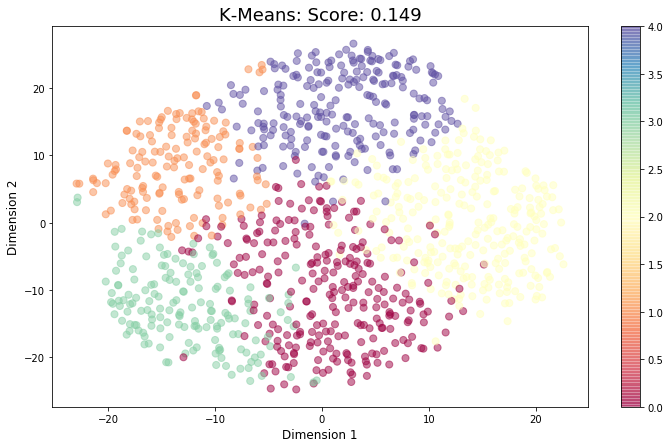

In [35]:
cluster_visual(tsne_dimentions,clusters,'K-Means: Score: %.3f'%(silhouette_score(Scaled_data,clusters)))

In [36]:
%%HTML

<h3>
2. Gaussian Mixture Model Clustering Algorithm
</h3>

<p>
    GMM is a generative algorithm which assumes that data follows a gaussian distribution. 
    It tries to identify elliptical shaped clusters in the data. 
    GMM can find clusters of different sizes which is its main advantage over K-means. 
    Similar to K-means, the hyper-parameter that needs to be tuned for GMM is number of clusters and covariance-type. 
    We have assumed number of clusters to be 5 considering the number of positions in the basketball play. 
    We selected best covariance-type based on the average silhouette score of the clusters.
</p>

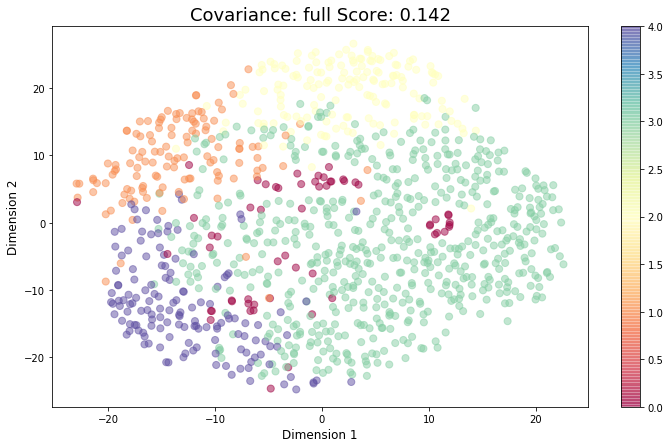

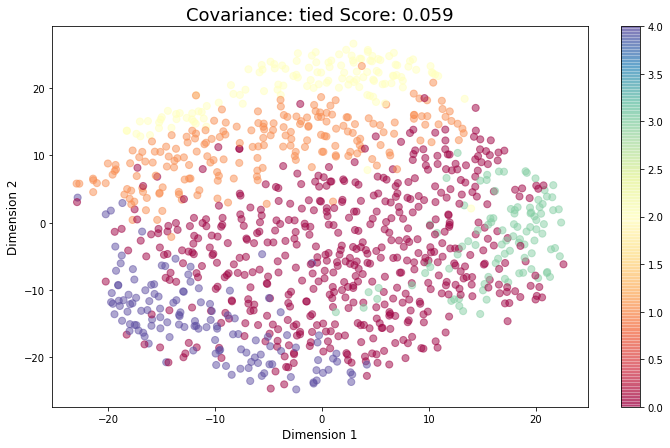

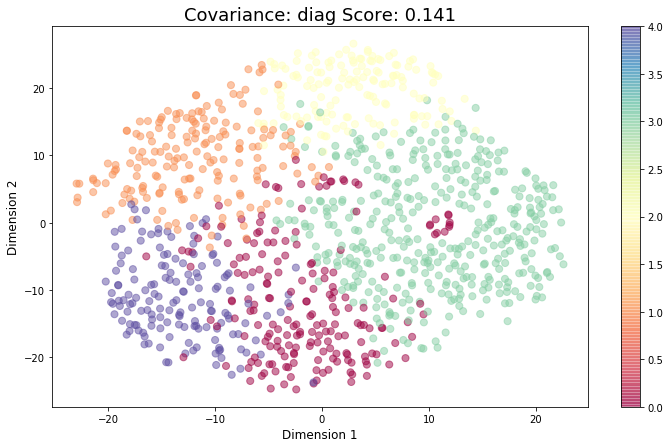

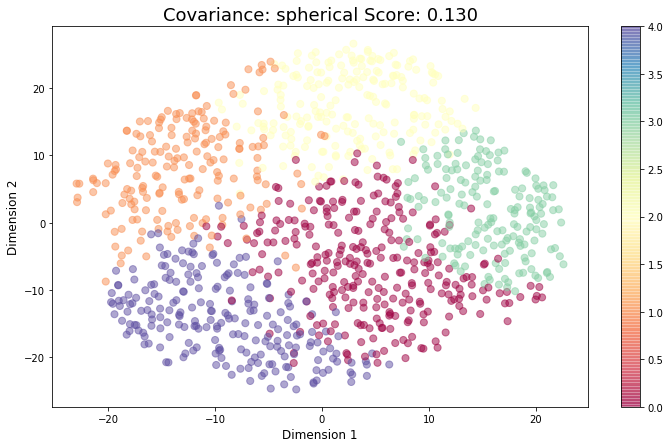

In [37]:
# GMM models
from sklearn.mixture import GaussianMixture as GMM

def Gmm(data, components,x):
    gmm = GMM(n_components = components,covariance_type=x,random_state=0)
    y_gmm = gmm.fit_predict(data)
    return y_gmm,gmm

for covariance_type in ['full','tied','diag','spherical']:
    clusters_gmm,gmm = Gmm(Scaled_data, 5,covariance_type)     
    cluster_visual(tsne_dimentions,clusters_gmm,'Covariance: %s Score: %.3f'%(covariance_type,
                                                                            silhouette_score(Scaled_data,clusters_gmm))) 

In [38]:
%%HTML

<h3>
3. Agglomerative Clustering Algorithm
</h3>

<p>
    Agglomerative clustering is a type of hierarchical clustering which follows a bottom-up approach to clustering. 
    Agglomerative algorithm can create cluster of different shapes and sizes,
    as there are no assumptions with respect to shape of the data distribution.
    The hyper parameters that need to be tuned for this algorithm are:
         <ol>
            <li>Linkage criteria: <b> Complete, Single, Ward, Average, Centroid, Ward</b>
            <li>Distance metrics: <b> l1, l2, Euclidean, Manhattan, Cosine </b> 
        </ol>
    The final parameters are chosen based on average silhouette score of the clusters and visual analysis of the clusters.
    
</p>

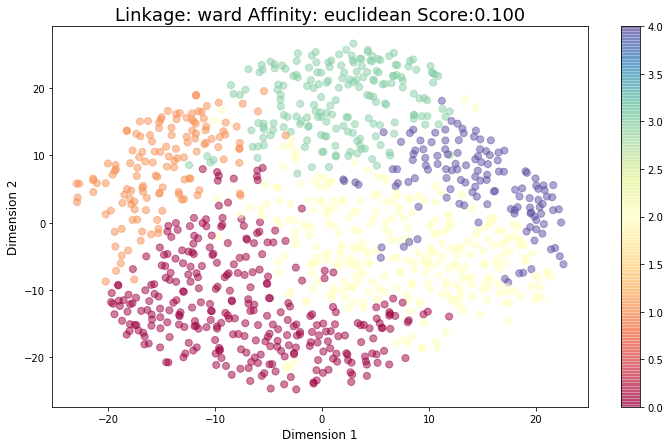

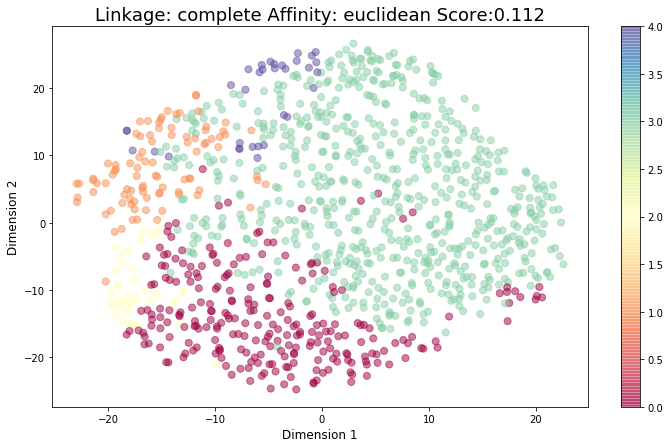

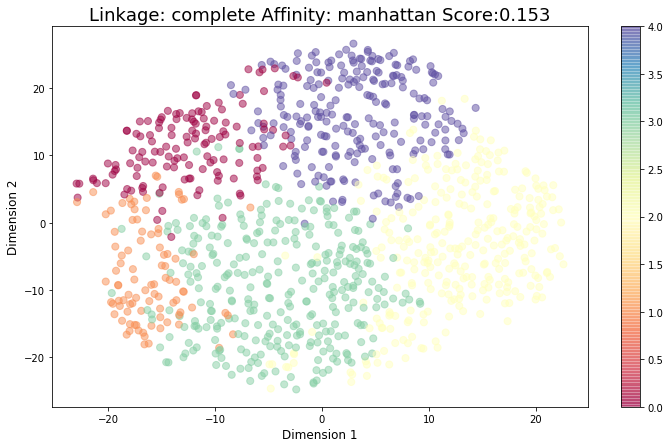

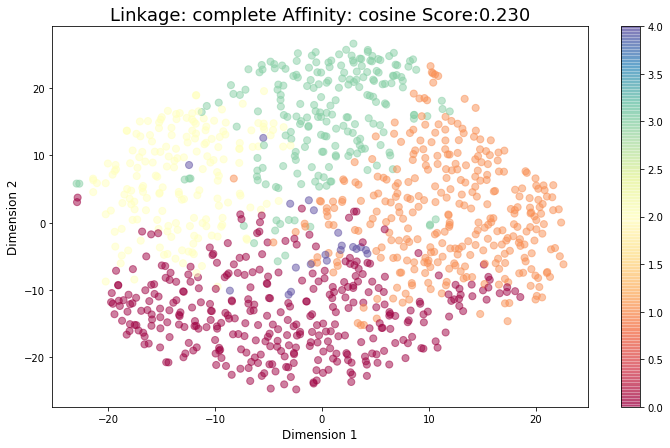

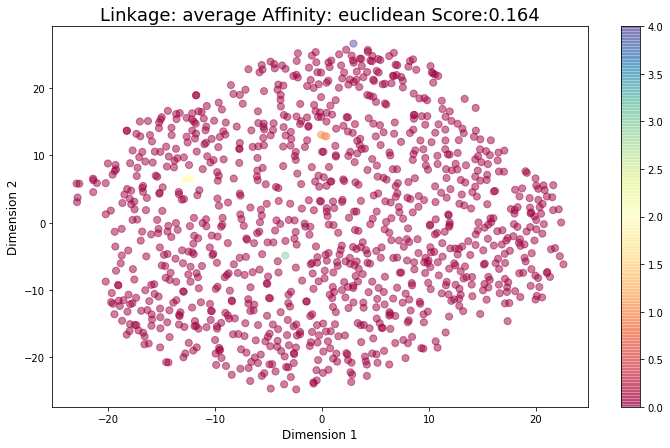

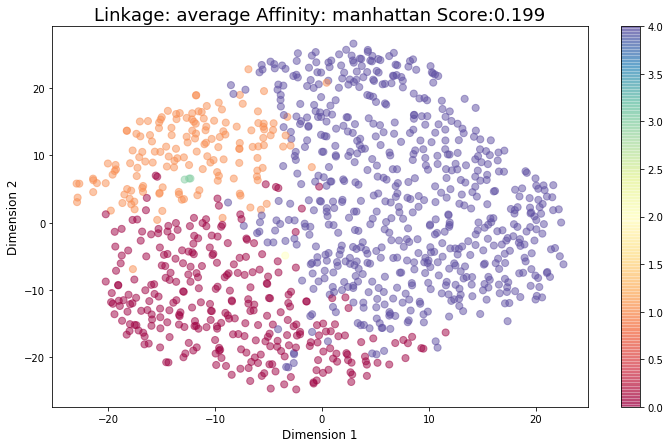

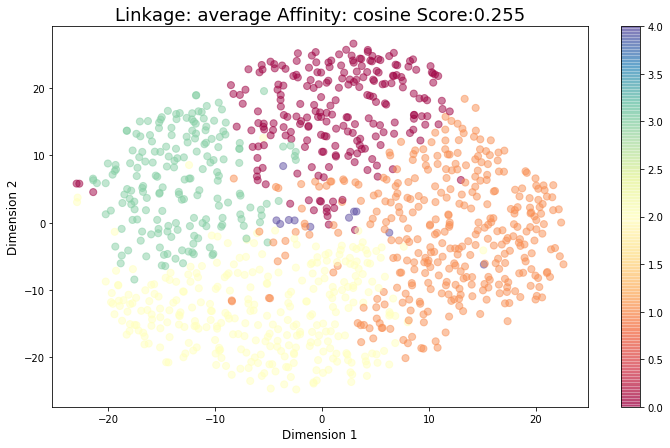

In [39]:
def Agg(data, linkage,affinity):
    agg = AgglomerativeClustering(n_clusters=5, linkage=linkage,affinity=distance)
    clusters=agg.fit_predict(data)
    return clusters

linkage='ward'
distance='euclidean'
clusters_agg=Agg(Scaled_data,linkage,distance)
cluster_visual(tsne_dimentions,clusters_agg,'Linkage: %s Affinity: %s Score:%.3f'
               %(linkage,distance,silhouette_score(Scaled_data,clusters_agg,metric=distance)))

for linkage in ['complete','average']:
    for distance in ['euclidean','manhattan', 'cosine']:
        clusters_agg=Agg(Scaled_data,linkage,distance)
        cluster_visual(tsne_dimentions,clusters_agg,'Linkage: %s Affinity: %s Score:%.3f'
                       %(linkage,distance,silhouette_score(Scaled_data,clusters_agg,metric=distance)))

In [40]:
%%HTML

<h3>
3. Other Clustering Algorithm
</h3>

<p>
    To improve the performance of clustering, we tested other generative algorithms like 
        <ol>
            <li> Density-Based Spatial Clustering of Applications with Noise
            <li> Mean Shift
        </ol>
    Both of these algorithm do not require number of clusters as input. 
    Since, there are no significant blobs in the data, these algorithms fail to create more than two clusters.
</p>

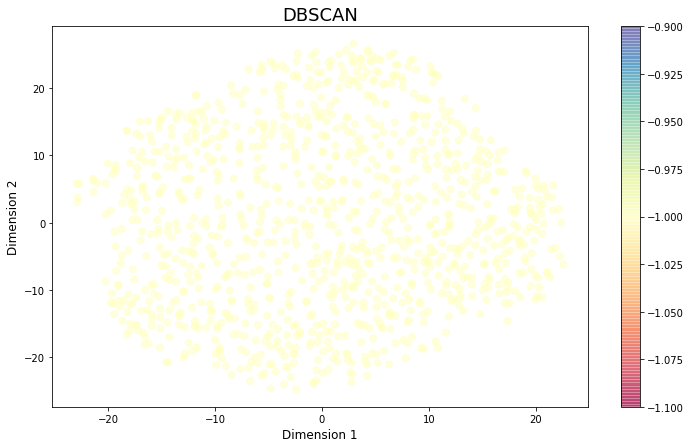

In [41]:
from sklearn.cluster import DBSCAN
clusterer = DBSCAN()
cluster_dbscan=clusterer.fit_predict(Scaled_data)
cluster_visual(tsne_dimentions,cluster_dbscan,'DBSCAN')

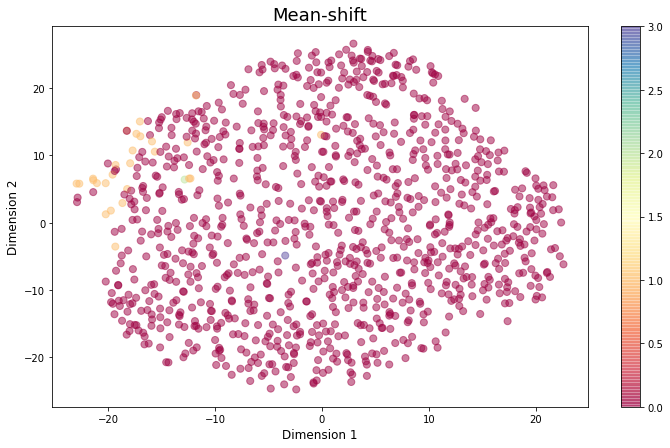

In [42]:
ms = MeanShift()
cluster_ms=ms.fit_predict(Scaled_data)
cluster_visual(tsne_dimentions,cluster_ms,'Mean-shift')

In [21]:
%%HTML
<h3>
Clustering Algorithm Comparison Part 1: Silhouette Score
</h3>
<p>
We have used silhouette score to choose best parameters for K-means and GMM. 
For Agglomerative algorithms, some of the models with high silhouette score did not have well defined cluster. 
For example, for hyper-parameter linkage = average and affinity=cosine, the silhouette score is highest. 
However, when we visualize the clusters, one cluster is almost non-existent. So, we have chosen the model which creates 
five well-defined clusters.Based on the silhouette score as well as visual analysis, we can conclude that agglomerative 
clustering algorithm generates best results. 
</p>
<p>
<center>
<figure>
    <img src="compare.jpeg" alt="1" style="width: 45%; height = 30%;" align = 'center'/>
    <figcaption><p style="text-align:center; font-style: italic; font-size: 11px">Silhouette score comparison of algorithms
    </p>
    . 
    </figcaption>
</figure>

In [40]:
%%HTML

<h3>
Clustering Algorithm Comparison Part 2: Exploratory Data Analysis
</h3>

<p>
    We have used silhouette score to choose the best clustering technique, Agglomerative clustering. In order to further
    validate the results we explored the results the clustering gave us. The approach was to plot bivariate plots in Tableau
    to see if our cluster assignments matched our assumptions (see strategy for clustering) for players classification.
</p>

<p>
    The bivariate plots are as follows:
    <ol>
        <li>
            <b>Center: Rebounds vs Fouls</b>
            <figure>
                <img src="AGG C.png" alt="1" align = 'center'/>
            </figure>
        </li>
        <br>
        <br>
        <li>
            <b>Power Forward: Height vs Two-point percentage</b>
            <figure>
                <img src="AGG PF.png" alt="1" align = 'center'/>
            </figure>
        </li>
        <br>
        <br>
        <li>
            <b>Point Guard: Assists vs Three point percentage</b>
            <figure>
                <img src="AGG PG.png" alt="1" align = 'center'/>
            </figure>
        </li>
        <br>
        <br>
        <li>
            <b>Shooting Guard: Points vs Three point percentage</b>
            <figure>
                <img src="AGG SG.png" alt="1" align = 'center'/>
            </figure>
        </li>
    </ol>
</p>

<p>
    <b>The players highlighted in the graphs are consistent with our set of prior assumptions, serving as further proof 
    that Agglomerative clustering gave us meaningful results.</b>
</p>

In [13]:
%%HTML
<h3>Conclusion and Result using Live Example: Grayson Allen</h3>
    
<p>
    After the 2017-2018 performance of the Utah Jazz, some of the key weaknesses of the team were coming forward. They were 
    freshly infused with a number of young talented players but at the same time had lost some experienced individuals to the
    Boston Celtics, namely Gordon Hayward. Analyst and fans alike saw this as a massive gap in the offensively capabilities 
    of the team, because with the exit of Hayward, existed 21.9 PPG. 
    
    The Jazz were lead by Donovin Mitchell as their primary shooting guard, but even with his presence the Jazz struggled 
    offensively. They had plenty of play-makers in their team but were in sore need of a shooter.
</p>

<p>
    Grayson Allen was in his senior year at Duke, not the best year for a draft prospect as most are recruited much earlier.
    He played point guard for the blue devils, but was a traditional one per say. He was unusually tall for a point guard
    and was improving on his three point shooting.
    
    His drafting story is much talked about. It was only when Donovan Mitchelle was seeing one of his games and coincidently
    so was the top brass of the Utha Jazz did Allen get recommended. He was just what Utha needed, a player that played point
    guard but could fill in offensively as a shooting guard. It was then that Allen was drafted as the 21st pick in the 2018
    NBA draft. But suprisingly enough it was only the right mixture of circumstances that got him the recommendation.
    <br><br>
    <figure>
    <img src="allen.jpg" alt="1" align = 'center'/>
    <figcaption><p style="text-align:center; font-style: italic; font-size: 11px">Grayson Allen: 21st Pick overall 2018 Daft
    </p>
    </figcaption>
</figure>
</p>

<p>
    This is consistent with our data. Allen appears on the border of the clusters between Shooting Guard and Point Guard,
    despite his height. The clustering technique and the visual could thus be used by the scouts of the Jazz to perhaps 
    make the draft early on, seeing that his player had the potential to not just be a good point guard but also a good 
    shooting guard. <b>So it would not be luck but intelligent use of data to identify these players early on.</b>
</p>

<p>
    A Utha jazz scout could have used our model to identify not just Grayson Allen but many other players who might have been
    looked over due to them going undrafted till their senior year. His skills matched exactly with what the Jazz were looking
    for and thus could <b>have helped scouts greatly in filtering and identifying talent specific to their needs.</b>
</p>

## Some toy examples to cover topics asked for in the job requirement 

In [8]:
# Exception handling and loggin
import logging
logging.basicConfig(level=logging.WARNING)
logging.basicConfig(filename='log_file.log', filemode='w')

def file_reader(file_name):
    '''
    file_reader is used to read the contents of a file while making sure
    the file exists. Incase of an eror it returns a message explaining
    the error.
    '''
    try:
        with open(file_name) as file:
            read_data = file.read()
    except:
        logging.warning('No such file! Please check the file name')

file_reader('hi.txt')